In [1]:
#get datasets from task 1
%run task3_1.ipynb     #this is were my function was stored
initFeatures, starsTarget = getStarsInitial()
starsTarget = encodeStars(starsTarget)
starsFeatures = pruneStars(imputeStars(initFeatures), starsTarget)

initDatasetDate, initDatasetCategorical, initDatasetNumerical, garmentTarget = getGarmentInitial()
datasetDate = garmentDetectAndEncodeDate(dateImputeAbove(initDatasetDate))
datasetCategorical = garmentEncodeCategorical(imputeAboveMultiple(initDatasetCategorical))
garmentDataset = pruneGarment(concatenateAndImputeNumericalGarment(datasetDate,datasetCategorical,initDatasetNumerical), garmentTarget)

In [2]:
def starsSVC(starsFeatures,starsTarget):
    '''Performs support vector classification on the stars dataset and outputs information about results '''
    #import modules
    from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, explained_variance_score
    from sklearn.svm import LinearSVC
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import KFold 
    #standardize the features using minmax
    mms = MinMaxScaler(feature_range=(0, 1))
    starsFeatures = mms.fit_transform(starsFeatures)
    
    #prepare k fold using 10 splits
    kf = KFold(n_splits=10)
    #arrays to hold information about variance and accuracy for each fold
    variance = np.zeros(10)
    scores = np.zeros(10)
    i = 0
    #for each fold, fit the model and obtain accuracy and variance
    for train_idx, test_idx in kf.split(starsFeatures):
        features_train_kfold, features_test_kfold = starsFeatures[train_idx], starsFeatures[test_idx]
        labels_train_kfold, labels_test_kfold = starsTarget[train_idx], starsTarget[test_idx]
        #fit the model and generate predictions
        model = LinearSVC().fit(features_train_kfold, labels_train_kfold)
        model_pred = np.around(model.predict(features_test_kfold))
        scores[i] = accuracy_score(labels_test_kfold, model_pred)
        variance[i] = explained_variance_score(labels_test_kfold, model_pred)
        print(variance[i])
        i = i + 1

    print("average accuracy",scores.mean())
    print("variance:",variance.mean())
    
    #create a new model to use to create a graph
    features_train, features_test, labels_train, labels_test = train_test_split(starsFeatures, starsTarget, test_size=0.25)
    
    model = LinearSVC().fit(features_train, labels_train)
    print('Training:', model.score(features_train, labels_train))
    print('Testing:', model.score(features_test, labels_test))
    
    
    # compute predictions for samples in the testing dataset, rounded to nearest integer
    model_pred = np.around(model.predict(features_test))
    print("accuracy:",accuracy_score(labels_test, model_pred))
    #create graph
    ConfusionMatrixDisplay.from_predictions(labels_test, model_pred)
    plt.show()

In [3]:
#starsSVC(starsFeatures,starsTarget)

In [4]:
def garmentSVR(garmentDataset, garmentTarget):
    '''Performs support vector regression on the garment dataset and outputs information about results'''
    #import modules
    from sklearn.svm import SVR, SVC, LinearSVR
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, explained_variance_score
    from sklearn.model_selection import KFold 
    #standardize the features
    mms = MinMaxScaler(feature_range=(-1, 1))
    garmentDataset = mms.fit_transform(garmentDataset)
    
    #prepare k fold
    kf = KFold(n_splits=10)
    #arrays for measuring data across folds
    scores = np.zeros(10)
    variance = np.zeros(10)
    i = 0
    #for each gold create a model
    for train_idx, test_idx in kf.split(garmentDataset):
        features_train_kfold, features_test_kfold = garmentDataset[train_idx], garmentDataset[test_idx]
        labels_train_kfold, labels_test_kfold = garmentTarget[train_idx], garmentTarget[test_idx]
        #fit the model and generate predictions
        model = SVR(max_iter=1000000)
        model.fit(features_train_kfold, labels_train_kfold)
        model_pred = model.predict(features_test_kfold)
        scores[i] = mean_squared_error(labels_test_kfold, model_pred, squared=False)
        variance[i] = explained_variance_score(labels_test_kfold, model_pred)
        print("variance",variance[i])
        i = i + 1

    print("average error",scores.mean())
    print("variance:",variance.mean())

    #create graph of a model output
    features_train, features_test, labels_train, labels_test = train_test_split(garmentDataset, garmentTarget, test_size=0.25)
    
    model = SVR(max_iter=1000000)
    model.fit(features_train, labels_train)
    
    # compute predictions for samples in the testing dataset
    model_pred = model.predict(features_test)

    # scatter plot of actual and predicted values for the target variable for first 10 samples
    plt.plot(labels_test[:10], 'o', label='Actual')
    plt.plot(model_pred[:10], 'o', label='Prediction')
    plt.legend()
    plt.xlabel('Index of sample') # label of x-axis
    plt.ylabel('Actual/Predicted value of the target') # label of y-axis

variance -0.019247378678770577
variance 0.09661769972044942
variance 0.02107051799898285
variance 0.12574327830227483
variance 0.18343896790609182
variance 0.24599281149183838
variance -0.19938256185818548
variance -0.08747933793861407
variance 0.07471763071078696
variance 0.11502614595592753
average error 0.16667491672855966
variance: 0.055649777361078165


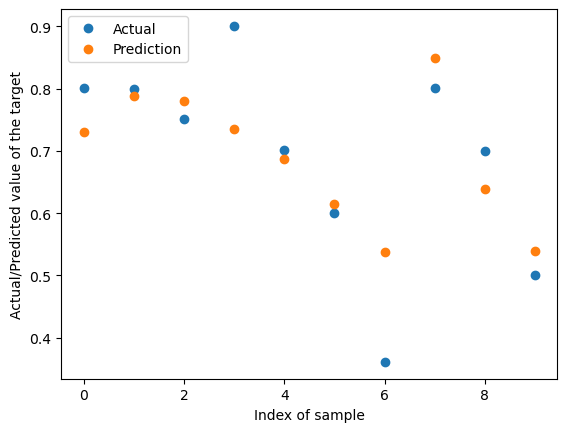

In [5]:
garmentSVR(garmentDataset, garmentTarget)

Markdown question for task3_3:
For the garment dataset, I am using a hypothesis that support vector regression will give a lower mean squared error than linear regression. Sample size is 10 and mean difference is 0.05222890958. Linear regression variance, removing below 0 results, is 0.1504525. Support vector regression edited variance is 0.12235682528. This gives a t value of 0.316. Therefore the percentage for the original hypothesis is from 0 to 50%, and therefore we should reject the original hypothesis due to lack of trust.

For the stars dataset, my hypothesis is that accuracy will be higher for support vector classification than linear regression. Sample size is 10, mean difference for accuracy is 0.3618799. Linear regression variance is 0.08103333333. SVC variance is 0.5820865909366972. This gives a T value of 1.483, corresponding to 80% chance. Therefore I reject the null hypothesis that linear regression is better than SVC.